In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

Introduction
------------

In this notebook accompying my video on plotting in Python using the Matplotlib library, I wanted emphasize a couple of the 
most common tasks and concepts you need when using the plotting tools to visualize some data.


Visualizing Functions
---------------------

Once again, it is important to be comfortable with the use of Python functions and NumPy arrays as a representation of
a mathematical function in order to be able to fully understand the Lecture 05 material.  I have shown you a couple
of times how to define a function in Python that will accept a NumPy array and then compute the function for each value
in the input array.  For example, the Matplotlib lecture notebook throughout uses the function:

$f(x) = x^2$

To illustrate plotting.

In [3]:
def f(x):
    return x**2

In [4]:
x = np.linspace(-5., 5., 5)
print(x)
print(f(x))

[-5.  -2.5  0.   2.5  5. ]
[25.    6.25  0.    6.25 25.  ]


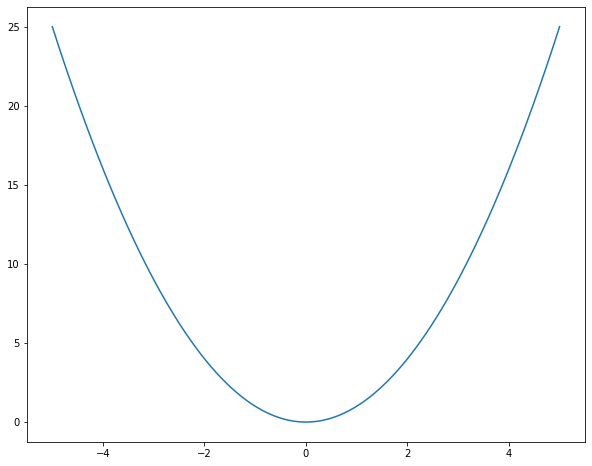

In [5]:
x = np.linspace(-5., 5., 100)
y = f(x)
plt.plot(x, y);

To make this clear, we are here creating a function that computes the square of any input value:

In [6]:
print(f(3))
print(f(-10))

9
100


Given an array, it computes the function on all values in the array:

In [7]:
print(f(np.array([3, -10, 4, -2])))

[  9 100  16   4]


Whenever you see simple plots, like the above, we are simply creating an array of x values over the range we wish to 
visualize, then computing the function for each of the values in the x array.  The basic plot command only requires 2
parameters for a 2D plot, an array holding the x values, and a corresponding array holding the y values.  These 2 arrays
must be of equal length.  

For example, if we want to plot the points (1,1), (2,4), and (3,9)  we might do this:

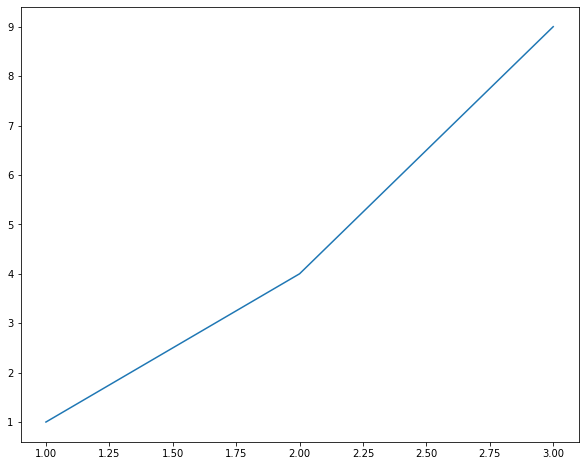

In [8]:
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y);

The default behavior of plot is to draw lines between the points, which might not be a very good idea in this case as these
are really just independent points we picked to draw.  We can instead ask the plot command to plot using point rather than
lines:

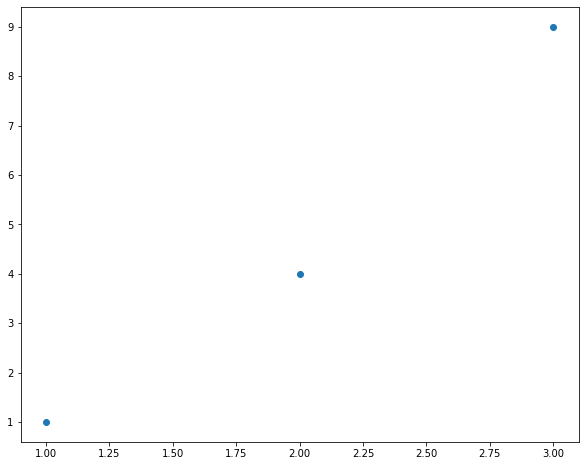

In [9]:
plt.plot(x, y, 'o');

Notice our 2 end points are not too visible because of how the axis are set.  We could use the range() functions to set the
range of the axis, or we could change the axis layout parameters in order to view better.  Lets change the range of the axis
a bit:

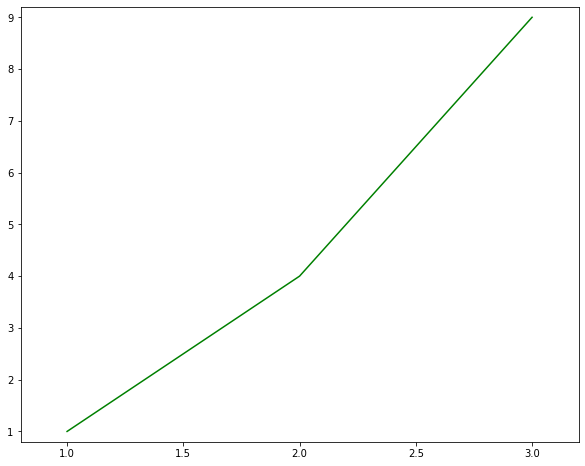

In [10]:
plt.plot(x, y, 'g-')
plt.axis([0.8, 3.2, 0.8, 9.2]);

Note that the basic plot command requires that the length of the x and y lists/arrays be equal, because it combines
each element in x with the corresponding element in y to determine all of the x,y pairs that are plotted.  It is
an error to try and plot lists/arrays of differing lengths.

Caught ValueError: x and y must have same first dimension, but have shapes (2,) and (3,)
Remove the try/except statements to generate the exception for yourself


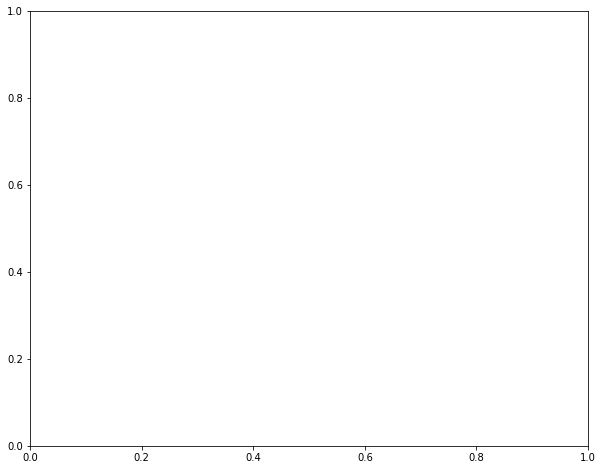

In [11]:
x = [1, 2]
y = [1, 4, 9]

try:
    plt.plot(x, y) # causes error, x and y must have same number of elements or same number of dimensions
except ValueError:
    print('Caught ValueError: x and y must have same first dimension, but have shapes (2,) and (3,)')
    print('Remove the try/except statements to generate the exception for yourself')

This brings us back, finally, to plotting our mathematical functions.  Unlike the 3 independent points I have just been 
plotting, a function is defined (usually) over all possible points (an infinite number of them).  Of course, we can't
represent an infinite number of points on a finite screen with a finite number of pixels.  But if we plot enough points
and draw lines between them, the differences become invisible as the number of points approaches the number of pixels we
have on our screen width and height for plotting the representation of the function.

For example, back to our simple formula that squares the value of its input:

In [12]:
def f(x):
    return x**2

x = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
y = f(x)
print(x)
print(y)

[ 2  4  6  8 10 12 14 16 18 20]
[  4  16  36  64 100 144 196 256 324 400]


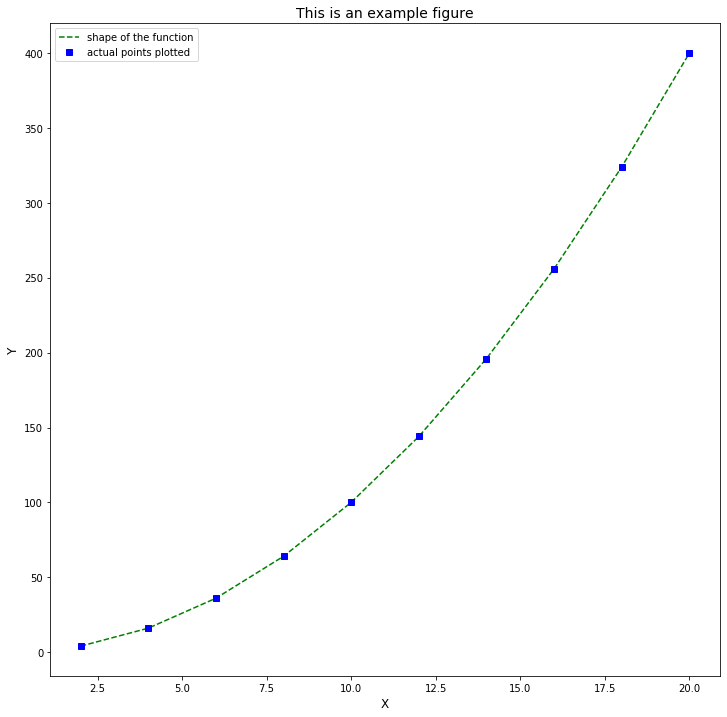

In [13]:
plt.figure(figsize=(12,12))
plt.plot(x, y, 'g--', label='shape of the function')
plt.plot(x, y, 'bs', label='actual points plotted')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("This is an example figure", fontsize=14)
plt.legend(loc=2);

Notice that the line is still visually non-smooth with 5 points, even though we know that the actual function is a smooth curve.
However, even with as few as 10 points, we begin to not be able to visually see the non-smoothness that the connecting line
segments (which are just estimations of the actual curve) cause:

[ 1  2  3  4  5  6  7  8  9 10]
[  1   4   9  16  25  36  49  64  81 100]


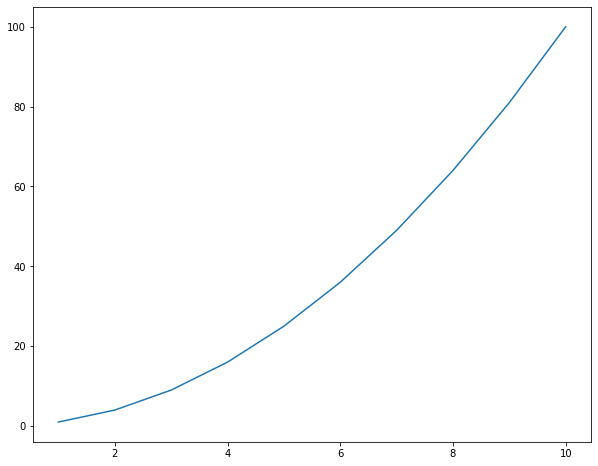

In [14]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = f(x)
print(x)
print(y)
plt.plot(x, y);
#plt.plot(x, y, 'o');

And this is basically what we have been doing when we plot/visualize mathematical functions up till now.  We use enough points
so that the estimation caused by joining up our finite number of points representing the curve are so small as to not be
noticable.  We usually use NumPy function to create a relatively large number of points in our x dimension in the area that
we want to visualize the function, like this:

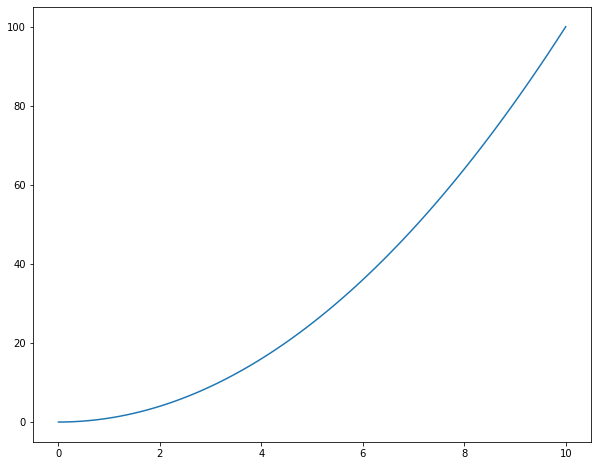

In [15]:
x = np.linspace(0, 10, 100) # 100 points evenly spaces from 0 to 10
y = f(x)
plt.plot(x, y);
#plt.plot(x, y, 'o');

Oh and one final note.  Hopefully people figured out that a common short cut being taken in the lecture notebooks is not
to define a function at all, but to simply use a NumPy vectorized mathematical expression to compute functions.  For
example, instead of defining explicitly functions for the square and the cube power of values, we can simply:

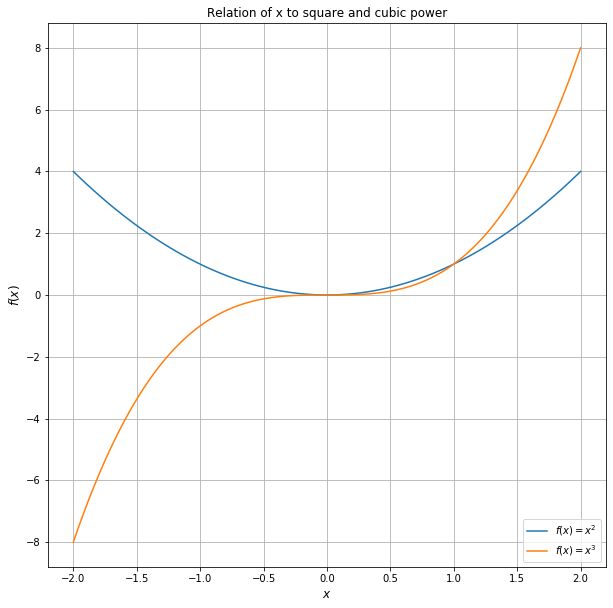

In [16]:
plt.figure(figsize=(10,10))
x = np.linspace(-2, 2, 100)
y2 = x**2 # the second power of the NumPy array elements
y3 = x**3 # the cubic or third power of the array elements

plt.plot(x, y2, label='$f(x) = x^2$')
plt.plot(x, y3, label='$f(x) = x^3$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.title('Relation of x to square and cubic power', fontsize=12)
plt.grid()
plt.legend(loc=4);

Basic Figure Labels
-------------------

The lecture notebook covered all of this, but let me again mention some of the most important labeling commands for
simple figures.  You should always provide labels of your x and y axis and a title for your graph when you create them
if they are going to be seen by other people (despite me not doing it in previous graphs).  If you have multiple
functions or data point sets, you should always uses graph legends and labels to indentify each curve/data item.

In the previous figure I demonstrated some of the most basic labeling commands.  You should always provide a
meaningful x and y label, giving units where appropriate (was data measured in inches, cm, in degrees farenheit, etc.).
Also you should provide a title giving some idea of the purpose of the figure/visualization.  And finally when
more than 1 function or set of data points are represented, you always need to label the different functions/data
with a figure legend.

Lets make another more realistic plot using some real data.  Remember the Stockholm temperature data we used back
in our NumPy lecture.  Lets plot the daily temperature data as points for the year of 1856:


In [17]:
data = np.genfromtxt('data/stockholm_td_adj.dat')
np.set_printoptions(suppress=True)
print(data.shape)
print(data[0:3,:]) # print first rows 

(77431, 7)
[[1800.     1.     1.    -6.1   -6.1   -6.1    1. ]
 [1800.     1.     2.   -15.4  -15.4  -15.4    1. ]
 [1800.     1.     3.   -15.   -15.   -15.     1. ]]


In [18]:
data[data[:,0] == 1856]

array([[1856. ,    1. ,    1. , ...,    1.4,    1.4,    1. ],
       [1856. ,    1. ,    2. , ...,   -0.8,   -0.8,    1. ],
       [1856. ,    1. ,    3. , ...,   -1.2,   -1.2,    1. ],
       ...,
       [1856. ,   12. ,   29. , ...,   -1.6,   -1.6,    1. ],
       [1856. ,   12. ,   30. , ...,   -5.3,   -5.3,    1. ],
       [1856. ,   12. ,   31. , ...,   -0.5,   -0.5,    1. ]])

In [19]:
d = data[data[:,0] == 1856] # get view of data only from year 1856
print(d.shape) # hmmm... 366 days, looks like 1856 was a leap year
temp = d[:,3] # temperature data only
days = np.arange(1, 367)
print(days.shape)

(366, 7)
(366,)


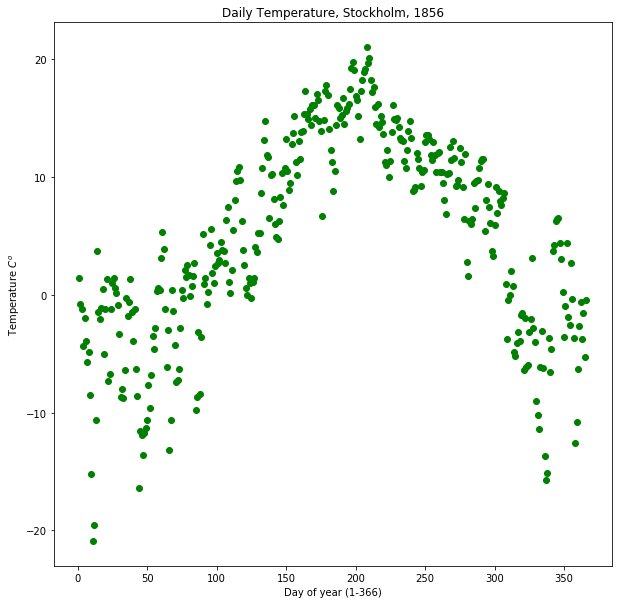

In [20]:
plt.figure(figsize=(10,10))

plt.plot(days, temp, 'go')
plt.xlabel('Day of year (1-366)')
plt.ylabel('Temperature $C^o$')
plt.axis('tight')
plt.title('Daily Temperature, Stockholm, 1856');

It can be hard to see the trend, and plotting the days using lines to connect the points doesn't help too
much either:

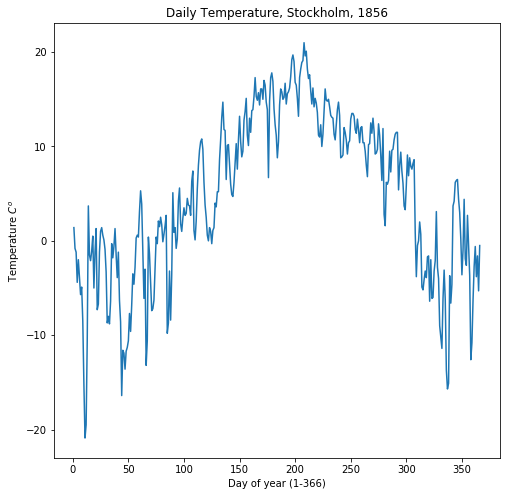

In [21]:
plt.figure(figsize=(8,8))

plt.plot(days, temp, '-')
plt.xlabel('Day of year (1-366)')
plt.ylabel('Temperature $C^o$')
plt.axis('tight')
plt.title('Daily Temperature, Stockholm, 1856');

For such time series, it is often better to use some smoothing method, the easiest of which is simply to calculate a running average of some window of days.  Such a smoothed curve, possibly plotted with the actual temperature datapoints, will help
us better visualize the actual temperature trend during the year:


In [22]:
def running_mean(x, N):
    """
    Calculate what is known as a running mean of the data in vector x.  N is the window size, e.g. the number
    of poitns that are averaged.
    """
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

temp_smooth = running_mean(temp, 10) # running mean with 10 day window
print(temp_smooth.shape)

(366,)


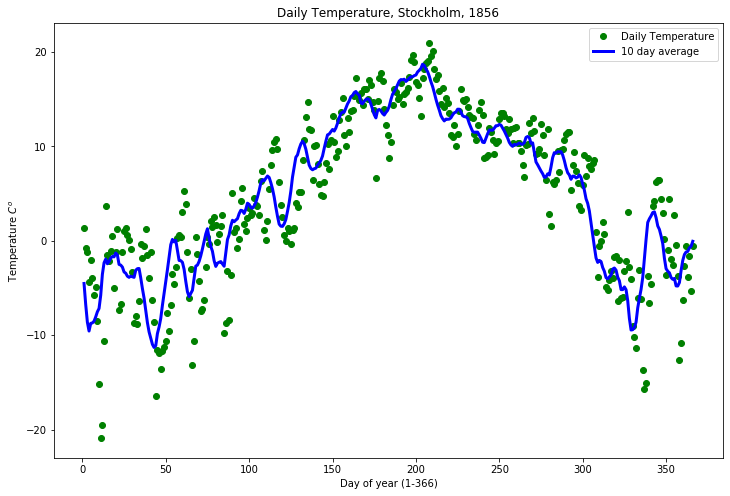

In [23]:
plt.figure(figsize=(12,8))

plt.plot(days, temp, 'go', label='Daily Temperature')
plt.plot(days, temp_smooth, 'b-', linewidth=3, label='10 day average')
plt.xlabel('Day of year (1-366)')
plt.ylabel('Temperature $C^o$')
plt.legend()
plt.axis('tight')
plt.title('Daily Temperature, Stockholm, 1856');

The figure would be immensely improved, in terms of an unfamiliar viewer understanding the data, if we labeled the x axis using Month/Day labels.  This can be done by setting the xtick() labels appropriately, as shown in the lecture notebook (left as an
exercise for the student).